In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/AL/FruitinAmazon"

test  train


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/AL/FruitinAmazon.zip"
extract_path = "/content/drive/MyDrive/AL/FruitinAmazon"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
data_dir = "/content/drive/MyDrive/AL/FruitinAmazon"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import os
# Define dataset path
train_dir = "/content/drive/MyDrive/AL/FruitinAmazon/train"
# Get class names (subdirectories)
class_names = sorted(os.listdir(train_dir))
if not class_names:
  print("No class directories found in the train folder!")
else:
  print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [ ]:
from PIL import Image, UnidentifiedImageError
import os

corrupted_images = []  # List to store corrupted images path

# Loop through each class folder and check for corrupted images
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):  # Ensure it’s a valid directory
        images = os.listdir(class_path)

        for img_name in images:
            img_path = os.path.join(class_path, img_name)

            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify image integrity
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

# Print results
if corrupted_images:
    print("\nCorrupted Images Found:")
    for img in corrupted_images:
        print(img)
else:
    print("\nNo corrupted images found.")



No corrupted images found.


In [ ]:
# Dictionary to store class counts
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)  # Count images in each class

# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)

for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")

print("=" * 45)



Class Distribution:
Class Name               Valid Image Count
acai                                  15
cupuacu                               15
graviola                              15
guarana                               15
pupunha                               15
tucuma                                15


In [ ]:
import random

selected_images = []  # Store image paths
selected_labels = []  # Store corresponding class names

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if images:  # Ensure the class folder is not empty
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)


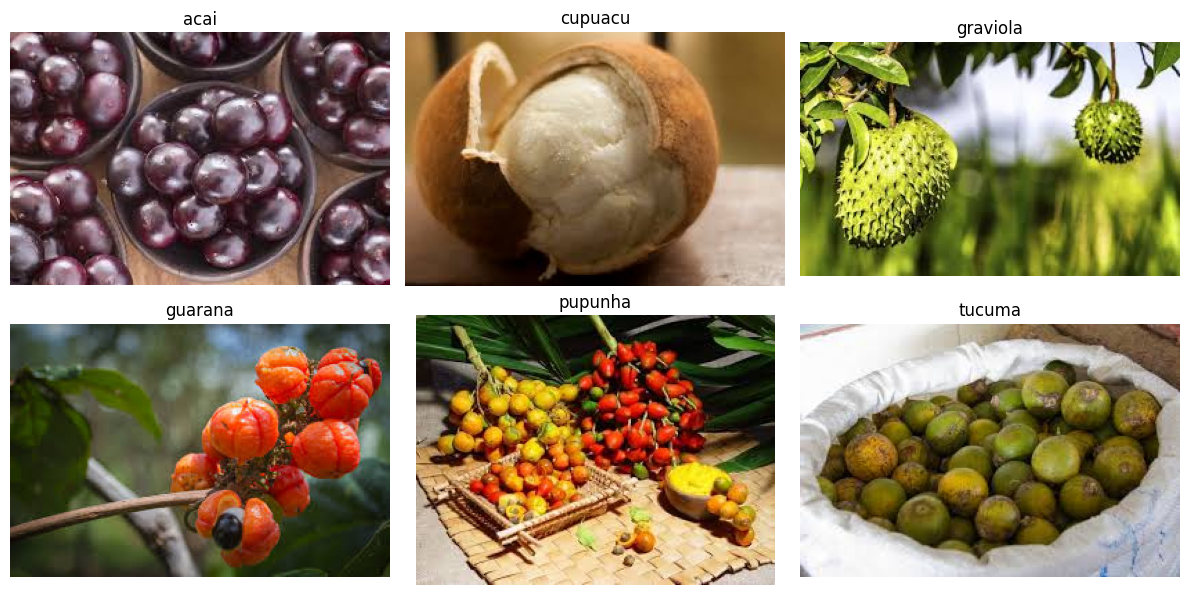

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Determine grid size
num_classes = len(selected_images)
cols = (num_classes + 1) // 2  # Determine columns
rows = 2  # Fixed rows for layout

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")  # Hide empty subplots

plt.tight_layout()
plt.show()


In [ ]:
image_size = (28, 28)
batch_size = 32
train_ds, val_ds = keras.utils.image_dataset_from_directory(
train_dir,
validation_split=0.2,
subset="both",
seed=1337,
image_size=image_size,
batch_size=batch_size,
)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Using 18 files for validation.


In [ ]:
for images, labels in train_ds.take(1):  # Take one batch
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)


Images shape: (32, 28, 28, 3)
Labels shape: (32,)


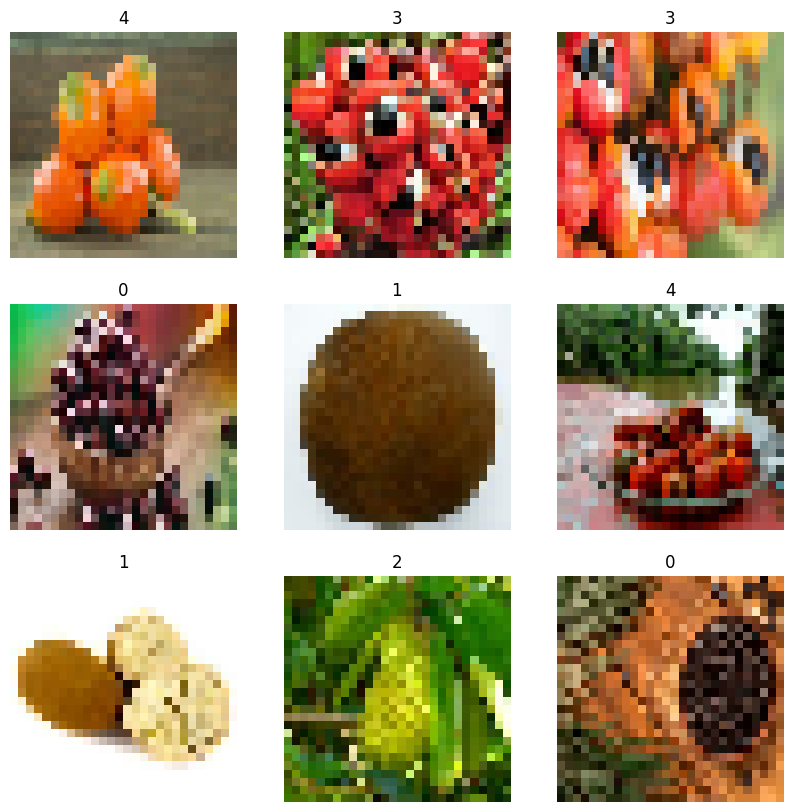

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # Takes one batch of images from the dataset (train_ds)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


In [ ]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]

def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images


In [ ]:
model = keras.Sequential([
    layers.Input(shape=(128, 128, 3)),
    *data_augmentation_layers,  # Include augmentation before the model layers
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
])


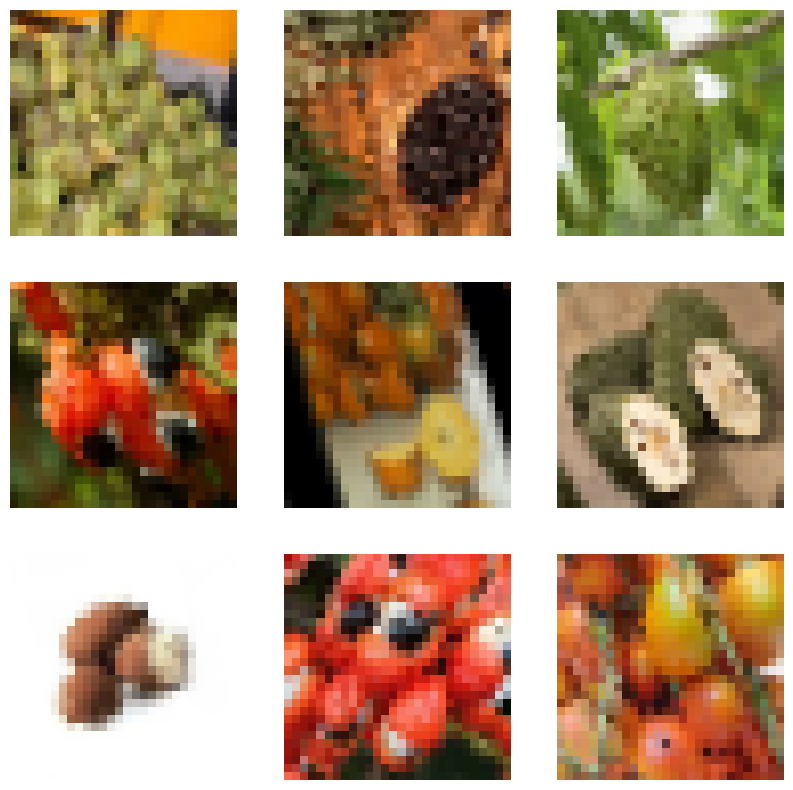

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[i]).astype("uint8"))
        plt.axis("off")


In [ ]:
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x), y)
)



In [ ]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension (grayscale)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Define a simple CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")  # 10 classes for MNIST digits
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.9094 - loss: 0.2995 - val_accuracy: 0.9852 - val_loss: 0.0459
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9869 - loss: 0.0417 - val_accuracy: 0.9871 - val_loss: 0.0400
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9919 - loss: 0.0271 - val_accuracy: 0.9919 - val_loss: 0.0243
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 36ms/step - accuracy: 0.9938 - loss: 0.0190 - val_accuracy: 0.9905 - val_loss: 0.0264
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9955 - loss: 0.0135 - val_accuracy: 0.9921 - val_loss: 0.0227
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9897 - loss: 0.0290
Test accuracy: 0.9921
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


In [ ]:
from tensorflow.keras.layers import Dropout

layer = Dropout(0.5)  # Drops 50% of the input units

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    BatchNormalization, Activation
)

# Data augmentation layers
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]

# Data augmentation function
def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

# Define the model using the Sequential API
model = Sequential([
    # Data augmentation applied using Lambda layer
    layers.Lambda(data_augmentation, input_shape=(224, 224, 3)),

    # Rescaling layer to normalize pixel values
    layers.Rescaling(1. / 255),

    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fourth Convolutional Block
    Conv2D(256, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten the output
    Flatten(),

    # First Fully Connected Layer
    Dense(512, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Second Fully Connected Layer
    Dense(256, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Third Fully Connected Layer
    Dense(128, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Fourth Fully Connected Layer
    Dense(64, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Output Layer
    Dense(10, activation='softmax')  # Adjust this number for your number of classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use this for integer labels
    metrics=['accuracy']
)

# Show model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 26,257,930 (100.17 MB)

 Trainable params: 26,255,050 (100.16 MB)

 Non-trainable params: 2,880 (11.25 KB)

In [ ]:
from tensorflow.keras.applications import VGG16
# Load the VGG16 model pre-trained on ImageNet, without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Freeze the layers of the base model
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# Add custom layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x) # Reduces dimensions (height, width) to a single vector per image
x = Dense(1024, activation='relu')(x) # Fully connected layer with 1024 neurons
x = Dense(10, activation='softmax')(x) # Output layer for 10 classes (with softmax for multi-class classification)

In [ ]:
from tensorflow.keras.models import Model
# Create the final model
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, [224, 224]), y))
val_ds = val_ds.map(lambda x, y: (tf.image.resize(x, [224, 224]), y))

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 60s 18s/step - accuracy: 0.1311 - loss: 5.2879 - val_accuracy: 0.3333 - val_loss: 4.9715
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 68s 24s/step - accuracy: 0.5951 - loss: 1.7842 - val_accuracy: 0.3889 - val_loss: 2.9353
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 56s 18s/step - accuracy: 0.9154 - loss: 0.3620 - val_accuracy: 0.4444 - val_loss: 3.5476
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 23s/step - accuracy: 0.7283 - loss: 0.9618 - val_accuracy: 0.3889 - val_loss: 2.9079
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 74s 19s/step - accuracy: 0.9223 - loss: 0.1772 - val_accuracy: 0.3333 - val_loss: 4.0110
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 23s/step - accuracy: 0.9674 - loss: 0.0595 - val_accuracy: 0.4444 - val_loss: 5.2040
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 23s/step - accuracy: 0.9813 - loss: 0.0789 - val_accuracy: 0.3889 - val_loss: 5.9777
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 55s 17s/step - accuracy: 0.9705 - loss: 0.0618 - val_accuracy: 0.3889 - val_loss: 5.8869
